In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

In [2]:
class ColorQuantizer:
    def __init__(self,image,colors):
        self.image = image
        self.colors = colors
        self.cluster_centers = None
        self.quantizedImage = None

    def quantize(self):  
        # conversion of image from 3D to 2D matrix Sutiable for Kmeans
        h,w,c = self.image.shape
        reshaped_image = self.image.reshape(h*w,c)
        
        # Form cluster to toatal number of colors provided by user
        quantizer = KMeans(n_clusters=self.colors)
        labels = quantizer.fit_predict(reshaped_image)
        self.cluster_centers = quantizer.cluster_centers_.round(0).astype(int)
        
        # sampling
        new_image = self.cluster_centers[labels]
        
        # conversion of image from 2D to 3D matrix Sutiable for user
        self.quantizedImage = new_image.reshape(h,w,c)
        

    def show(self):
        if self.quantizedImage is not None:
            return plt.imshow(self.quantizedImage)
        else:
            return 'No image provided'

Enter Number of Colors:6
Original :  AxesImage(54,36;334.8x217.44)


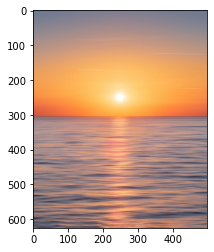

In [3]:
colors = int(input("Enter Number of Colors:"))
image = mpimg.imread("pexels-photo-1631678.jpeg")
quantizer = ColorQuantizer(image,colors)
quantizer.quantize()
print("Original : ",plt.imshow(quantizer.image))

Converted :  AxesImage(54,36;334.8x217.44)


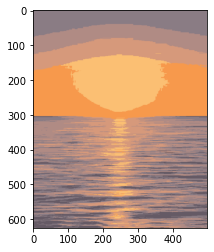

In [4]:
print("Converted : ",quantizer.show())